# Extracting Categorical Feature Embeddings Using Deep Factorization Machines

## Objective

This notebook aims to demonstrate the extraction of categorical feature embeddings to transform high-dimensional categorical variables into a more manageable format. These embeddings can capture complex relationships within the data, offering benefits such as improved model performance and better insights.

## Why Feature Embeddings?

Categorical variables often come with their own set of challenges: high cardinality, non-linear relationships, and more. 

Traditional encoding methods like one-hot encoding or label encoding may not capture these complexities. Feature embeddings provide a more nuanced approach, enabling models to understand the intricate relationships between categories.


## What's Inside This Notebook?

1. **SomeData Preprocessing**: Steps to prepare your categorical data for embedding extraction.
2. **Model Training**: Using a neural network-based model like DeepFM to train and capture these embeddings.
3. **Embedding Extraction**: Code to extract these learned embeddings from the model.
4. **Downstream Applications (Not Really, but for you to decide :D )**: How to use these embeddings in predictive analytics or clustering tasks.

## Benefits for End Users

1. **Enhanced Model Performance**: Potenially improved accuracy and efficiency in predictive models.
2. **Insightful Data Representation**: A richer understanding of complex relationships within the data.
3. **Versatility**: Can be applied in various sectors for different types of analytics and modeling tasks.

---

Feel free to use this summary as a guide or introduction to your Jupyter Notebook on extracting categorical feature embeddings. It's designed to offer end users a complete understanding of the what, why, and how of the process.

### Visual Example: Feature Embeddings in Customer Segmentation
Imagine we have a small dataset of farmers with two categorical features: "Type of Crop" (Wheat, Corn, Soybean) and "Equipment Used" (Tractor, Harvester, Plow). These can be one-hot encoded, but let's use feature embeddings to capture the nuances better.

#### Without Feature Embeddings:

One-hot encoding of "Type of Crop" and "Equipment Used" might look something like this:

Here, each feature is in a sparse binary format. While simple, this representation may not capture any relationship between different types of crops and equipment used.



\begin{array}{cccccc}
\text{Type_Wheat} & \text{Type_Corn} & \text{Type_Soybean} & \text{Equip_Tractor} & \text{Equip_Harvester} & \text{Equip_Plow} \\
\hline
1 & 0 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 & 1 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
\end{array}




#### With Feature Embeddings:

After training a model, we get embeddings for each category. Let's say the embeddings are 2-dimensional for simplicity. The transformed features might look something like this:
 
These embeddings capture more complex relationships between the categories. For example, maybe the embeddings capture that Corn and Tractors often appear together and represent a lower-risk profile.

\[
\begin{array}{cc}
\text{Embedding_Crop} & \text{Embedding_Equipment} \\
\hline
(0.3, -1.2) & (1.1, 0.5) \\
(-0.8, 1.4) & (-0.2, 1.3) \\
(1.2, -0.7) & (-1.1, -0.5) \\
\vdots & \vdots \\
\end{array}
\]

#### At Prediction Time

At prediction time you pass the new dataset to the embedding layer. This is essentially a lookup operation for each value of categorical feature. 

For a categorical variable
'Type: Corn' This will be a vector (X1, X2), if embedding size is 2 


## Technical Workflow

1. **Model Training**: Train a DeepFM machine learning model using some data.
2. **Embedding Extraction**: Extract the feature embeddings from the trained model.

# A Hypothetical Example

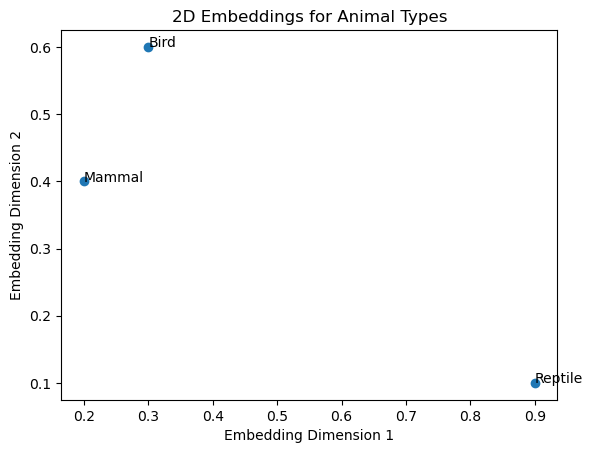

In [1]:
import matplotlib.pyplot as plt
# Hypothetical 2D embeddings
mammal = [0.2, 0.4]
reptile = [0.9, 0.1]
bird = [0.3, 0.6]

# Plotting
import matplotlib.pyplot as plt

plt.scatter([0.2, 0.9, 0.3], [0.4, 0.1, 0.6])
plt.text(0.2, 0.4, 'Mammal')
plt.text(0.9, 0.1, 'Reptile')
plt.text(0.3, 0.6, 'Bird')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.title('2D Embeddings for Animal Types')
plt.show()

In [7]:
import torch
import arff
import pandas as pd
import numpy as np
import scipy
import os
from scipy.io import arff

# Import additional libraries
from deepctr_torch.inputs import SparseFeat, get_feature_names
from deepctr_torch.models import DeepFM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# LOAD THE EXAMPLE DATA

In [3]:
# Load ARFF file
data, meta = arff.loadarff('D:\\Users\\UT\\Documents\\GitHub\\some_data\\dataset_31_credit-g.arff')

# Convert to a Pandas DataFrame
df = pd.DataFrame(data)

# Decode byte strings to regular strings
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if "class" not in col]

In [24]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [4]:
def custom_label_encoder(column):
    """
    Custom label encoder function.
    
    Parameters:
    column (pd.Series): A pandas Series containing the categorical variable.
    
    Returns:
    dict: A dictionary mapping each unique value in the Series to an integer, 
          with an additional "unknown" category.
    """
    # Get unique values from the column
    unique_values = column.unique()
    
    # Create a dictionary mapping each unique value to an integer
    encoding_dict = {val: i for i, val in enumerate(unique_values)}
    
    # Add an additional "unknown" category
    encoding_dict["unknown"] = len(unique_values)
    
    return encoding_dict


def map_unknown_values(col_a, col_b):
    """
    Takes two pandas Series (columns) and replaces the unique values 
    in the second column that are not present in the first column with "unknown".
    
    Parameters:
    col_a (pd.Series): The reference column
    col_b (pd.Series): The column to be modified
    
    Returns:
    pd.Series: Modified version of col_b
    """
    
    # Get unique values from both columns
    unique_a = set(col_a.unique())
    unique_b = set(col_b.unique())
    
    # Find the values in col_b that are not present in col_a
    not_in_a = unique_b - unique_a
    
    # Replace those values with "unknown" in col_b
    col_b_modified = col_b.replace(list(not_in_a), 'unknown')
    
    return col_b_modified


# APPLY SOME BASIC PRE-PROCESSING

In [5]:
# Split data into train and test sets
X = df[categorical_cols]
y = df['class']

target_label_encoder = {'good': 0, 'bad': 1}
y = y.apply(lambda x: target_label_encoder.get(x))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# All unique values seen in train split are considered the vocabulary for SpareFeat
# Any unknown values in test set will be mapped to 'unknown' which will have it's own embeddings
# This ensures any unknown values that might show up in test or prod doesn't break our algo
for cat_col in categorical_cols:
    X_test[cat_col] = map_unknown_values(X_train[cat_col] , X_test[cat_col])
    


# Make a copy for just exploration etc. 
X_train_encoded = X_train.copy(deep=True)
X_test_encoded = X_test.copy(deep=True)

# Label encode categorical columns X_train
label_encoders = {cat_col: custom_label_encoder(X_train[cat_col]) for cat_col in categorical_cols}


for cat_col in categorical_cols:
    label_encoder = label_encoders.get(cat_col)
    X_train_encoded[cat_col] = X_train_encoded[cat_col].apply(lambda x: label_encoder[x])
    X_test_encoded[cat_col] = X_test_encoded[cat_col].apply(lambda x: label_encoder[x])
    

# # Prepare feature columns for DeepFM
feature_columns = [SparseFeat(col, vocabulary_size=X_train_encoded[col].nunique(), embedding_dim=8) for col in categorical_cols]

# TRAIN THE MODEL


## Introducing DeepFM

DeepFM, or Deep Factorization Machines, is a hybrid algorithm that combines the power of Factorization Machines (FMs) for recommendation systems with Deep Learning for capturing intricate patterns within the data. This makes it particularly effective for handling both low- and high-order feature combinations, making it a popular choice for complex tasks involving categorical variables.

### Why Use DeepFM?

1. **High-Order Interactions**: Unlike traditional linear models, DeepFM can capture complex, high-order interactions between features, which is essential when dealing with numerous categorical variables.
  
2. **Computational Efficiency**: DeepFM efficiently combines the advantages of both FMs and deep neural networks, eliminating the need to engineer feature interactions manually.

3. **Versatility**: It's well-suited for both regression and classification tasks, making it a versatile choice for different types of predictive modeling.

### How Does DeepFM Fit into This Notebook?

In the context of this notebook, we use DeepFM to train a model capable of learning meaningful feature embeddings for our categorical variables. Once trained, these embeddings are extracted and used for downstream analytics and predictive modeling tasks. 

### Quick Overview of DeepFM Architecture

DeepFM consists of two main components:

1. **FM Component**: Captures low-order feature interactions and is excellent for handling sparse data.
2. **Deep Component**: A deep neural network that captures high-order feature interactions.

These two components share the same input and contribute to the final prediction, allowing the model to learn both low- and high-level feature interactions simultaneously.

---

In [8]:
use_cuda=True
if use_cuda and torch.cuda.is_available():
    print('cuda ready...')
    device = 'cuda:0'

# Initialize DeepFM model
model = DeepFM(feature_columns, feature_columns, task='binary')

# Compile model
model.compile("adam", "binary_crossentropy", metrics=["binary_crossentropy"])

# Create some tensors 
X_train_tensor = {col: torch.tensor(X_train_encoded[col].values, dtype=torch.long) for col in categorical_cols}
y_train = np.array(y_train)

X_test_tensor = {col: torch.tensor(X_test_encoded[col].values, dtype=torch.long) for col in categorical_cols}
y_test = np.array(y_test)

# Train DeepFM model
model.fit(X_train_tensor, y_train, batch_size=32, epochs=5, verbose=2)

cuda ready...
cpu
Train on 800 samples, validate on 0 samples, 25 steps per epoch
Epoch 1/5
0s - loss:  0.6337 - binary_crossentropy:  0.6337
Epoch 2/5
0s - loss:  0.5884 - binary_crossentropy:  0.5884
Epoch 3/5
0s - loss:  0.5411 - binary_crossentropy:  0.5411
Epoch 4/5
0s - loss:  0.5054 - binary_crossentropy:  0.5054
Epoch 5/5
0s - loss:  0.4978 - binary_crossentropy:  0.4978


In [23]:
## Basic Workflow, tune the model as you  wish for best performance
# This is just a toy example

model_predictions = model.predict(X_test_tensor)
binary_outcomes = (model_predictions >= 0.5).astype(int)

In [21]:
print(classification_report(y_test, binary_outcomes))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       141
           1       0.57      0.49      0.53        59

    accuracy                           0.74       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.73      0.74      0.73       200



## Get embeddings for train set

In [11]:
# Extract embeddings
embedding_dict = model.embedding_dict
feature_embeddings = []

for feat in feature_columns:
    layer = embedding_dict[feat.name]
    embedding_tensor = layer(X_train_tensor[feat.name])
    feature_embeddings.append(embedding_tensor.detach().cpu().numpy())

# Concatenate embeddings for all features
feature_embeddings_concat = np.hstack(feature_embeddings)

# Show shape of the concatenated embeddings
print("Shape of concatenated embeddings:", feature_embeddings_concat.shape)

Shape of concatenated embeddings: (800, 104)


## Get embeddings for test set 

In [12]:
# Extract embeddings
embedding_dict = model.embedding_dict
feature_embeddings_test = []

for feat in feature_columns:
    layer = embedding_dict[feat.name]
    embedding_tensor = layer(X_test_tensor[feat.name])
    feature_embeddings_test.append(embedding_tensor.detach().cpu().numpy())

# Concatenate embeddings for all features
feature_embeddings_concat_test = np.hstack(feature_embeddings_test)

# Show shape of the concatenated embeddings
print("Shape of concatenated embeddings:", feature_embeddings_concat_test.shape)

Shape of concatenated embeddings: (200, 104)


# How to Validate The Extracted Categorical Embeddings?


### 1. Downstream Task Performance

The most straightforward way to evaluate the quality of embeddings is to use them in a downstream task and measure the performance improvement.

Or Compare the performance of a model using feature embeddings against a baseline model that uses traditional encoding techniques like one-hot or label encoding, catboost encoder.


- **Classification or Regression Metrics**: 
If you're using the embeddings for a predictive task,
Add them to the model measure the before -> after. The metrics like accuracy, F1-score for classification, or RMSE for regression can be useful, or metrics like Gini coefficient or AUC-ROC could be relevant.

### 2. Transfer Learning Evaluation

Use the embeddings in a different but related task. If the embeddings are effective, they should improve performance on this new task as well.

### 3. Embedding Visualization

Visualizing embeddings can provide insights into their quality. For high-dimensional embeddings, dimensionality reduction techniques like t-SNE or PCA can be useful.

- **Cluster Analysis**: After dimensionality reduction, you can apply clustering algorithms like K-means to see if similar categories are grouped together.

### 4. Cosine Similarity Between Categories

Measure the cosine similarity between different categories in the embedding space. Categories that are expected to be similar should have higher similarity scores.

```python
from sklearn.metrics.pairwise import cosine_similarity

# Assuming embedding_1 and embedding_2 are the embeddings for two categories
similarity_score = cosine_similarity([embedding_1], [embedding_2])
```

### 5. Statistical Tests

Conduct hypothesis tests to see if the embeddings are significantly different across different groups, especially if you have prior expectations or domain knowledge about what those differences should be.

### 6. Interpretability

Although this is more subjective, understanding what each dimension in the embedding space represents can be valuable. Some techniques like Local Interpretable Model-agnostic Explanations (LIME) can help.

### 7. A/B Testing

If feasible, A/B tests can provide the most concrete evidence of the effectiveness of the embeddings. For example, use the embeddings to personalize insurance package recommendations and measure metrics like click-through rate or conversion rate.






# How Do I Use The Embedding As Is 

Examples are from insurance domain where I work

#### Clustering:

Now, imagine clustering these embeddings into different groups. The clusters might reveal that farmers who grow Wheat and use Plows are generally a higher-risk category, whereas those who grow Corn and use Tractors are a lower-risk category.

Certainly. Once we've obtained the clusters using the embeddings, various types of analyses can be performed to gain actionable insights specifically in the context of your domain. For me its  commercial and farm insurance pricing. Here's how:

### Risk Assessment and Pricing Strategy

1. **Cluster Profiling**: Analyze each cluster to identify its defining characteristics. For example, a cluster may predominantly consist of commercial buildings with certain attributes that are considered high-risk. 
   
2. **Risk Tiering**: Assign risk tiers to each cluster. High-risk clusters may warrant higher insurance premiums, while low-risk clusters could be eligible for discounted rates.

3. **Dynamic Pricing**: Use cluster membership as a feature in dynamic pricing algorithms. If a new customer falls into a particular cluster, the pricing algorithm can quickly assess the likely risk and determine an appropriate quote.

### Customized Insurance Packages

1. **Tailored Products**: Based on the cluster analysis, design insurance packages that cater to the specific needs and risks of each segment. For instance, a cluster of organic farms might be interested in a specialized package covering environmental liabilities.
  
2. **Upselling and Cross-Selling**: Identify clusters that are more likely to be interested in additional coverage or policies and target them with relevant offers.

### Fraud Detection

1. **Anomaly Detection**: If a policy or claim falls into a cluster that is statistically associated with higher instances of fraud, it can be flagged for further investigation.

2. **Predictive Modeling**: Cluster information can be used as a feature in predictive models aimed at identifying potentially fraudulent activity.

### Marketing and Customer Retention

1. **Targeted Marketing**: Use cluster information to develop marketing campaigns that appeal to specific segments, thereby improving the efficiency of marketing spend.

2. **Churn Prediction**: Clusters with higher attrition rates can be identified and targeted with retention strategies.

### Reporting and Decision-making

1. **Performance Metrics**: Monitor the performance of each cluster over time in terms of claims, profitability, and other KPIs. 

2. **Strategic Planning**: Use cluster analysis to inform long-term strategic decisions such as market entry, product development, and partnerships.

By conducting these types of analyses, you can make data-driven decisions that could significantly improve risk assessment, pricing strategies, and customer satisfaction in the commercial and farm insurance sectors. Would you like to dive deeper into any of these analysis types?
#### Application in Commercial and Farm Insurance:

By identifying these clusters, we can:
- Offer more competitive insurance rates for lower-risk profiles.
- Design specialized insurance packages for higher-risk profiles.

# Thanks 